# 1. Loading and Viewing Data



In [1]:
import pandas as pd
import warnings
import numpy as np
import os

warnings.simplefilter("ignore")


project_path = os.path.abspath("")

mushroom_train = pd.read_csv(project_path + "/data/mushroom_train.csv", sep=";")
mushroom_test = pd.read_csv(project_path + "/data/mushroom_test.csv", sep=";")

data = pd.concat([mushroom_train, mushroom_test], axis=0, ignore_index=True)
data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,e,52.41,o,y,y,f,p,NaN,y,5.47,...,NaN,k,k,NaN,NaN,f,f,NaN,d,u
61065,e,54.81,o,y,y,f,p,NaN,y,6.67,...,NaN,k,k,NaN,NaN,f,f,NaN,d,s
61066,e,49.95,o,y,y,f,p,NaN,y,6.43,...,NaN,k,n,NaN,NaN,f,f,NaN,d,u
61067,e,53.16,o,y,y,f,p,NaN,y,6.99,...,NaN,k,k,NaN,NaN,f,f,NaN,d,s


# 2. Splitting Data into Features and Labels

In [2]:
y = mushroom_train['class']

X = mushroom_train.drop("class", axis=1)

print(data.info())
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

# 3. Data Exploration and Visualization

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt 

X_poisonous = mushroom_train[mushroom_train['class']=="p"].drop("class", axis=1)
X_edible = mushroom_train[mushroom_train['class']=="e"].drop("class", axis=1)

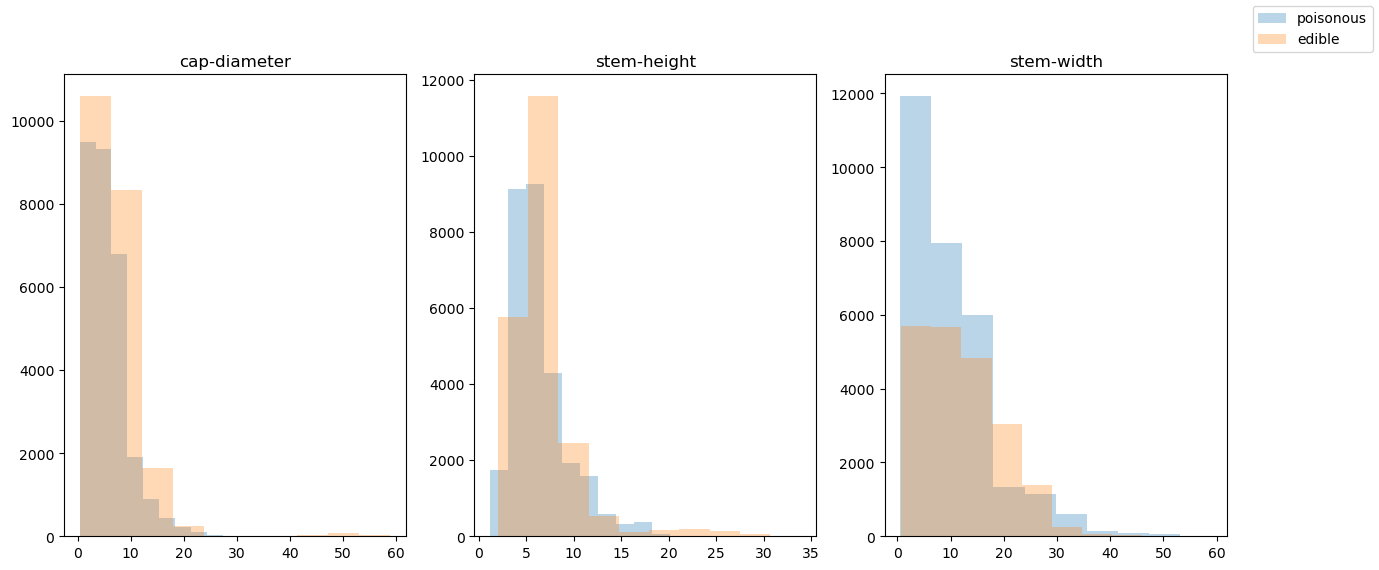

In [4]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize = (15,6))
ax1.hist(X_poisonous["cap-diameter"], alpha = 0.3, label="poisonous")
ax1.set_title("cap-diameter")
ax2.hist(X_poisonous["stem-height"], alpha=0.3)
ax2.set_title("stem-height")
ax3.hist(X_poisonous["stem-width"], alpha=0.3)
ax3.set_title("stem-width")

ax1.hist(X_edible["cap-diameter"], alpha = 0.3, label="edible")
ax2.hist(X_edible["stem-height"], alpha=0.3)
ax3.hist(X_edible["stem-width"], alpha=0.3)

fig.legend()

From these graphs we can see that there is a very big overlap for cap-diameter and stem -width for both poisonous and edible mushrooms. This means that they are not very good indicators of whether a mushroom is edible or not. On the other hand, there is a slight difference in the stem-height for both edible and poisonous mushrooms. Most of the edible mushrooms tend to have around 6 to 8 height while poisonous mushrooms - 4 to 6. Also, even though very slight, we see that some edible mushrooms tend to have bigger cap-diameter.

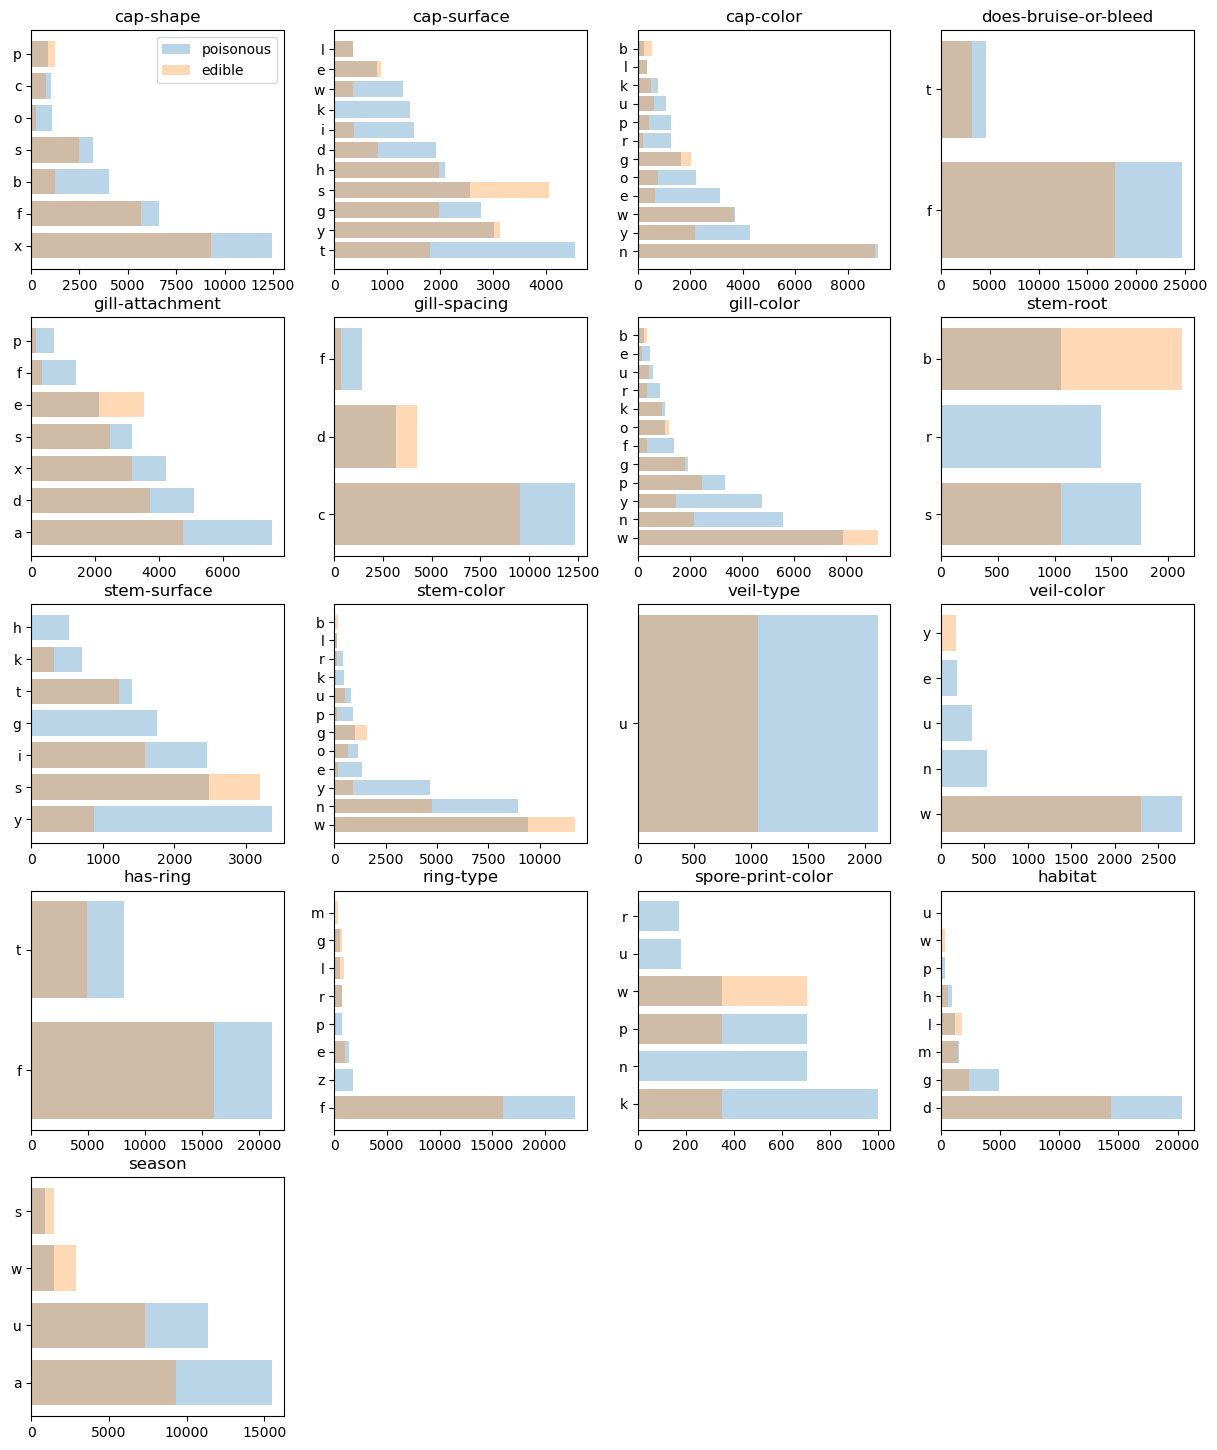

In [5]:
# categorical features
X_poisonous_categorical = X_poisonous.drop(["cap-diameter", "stem-height", "stem-width"], axis=1)
X_edible_categorical = X_edible.drop(["cap-diameter", "stem-height", "stem-width"], axis=1)

column_names = X_poisonous_categorical.columns

fig, ax = plt.subplots(5,4, figsize = (15,18))

for i in range(len(column_names)):
    p = X_poisonous_categorical[[column_names[i]]].value_counts().reset_index(name="count")
    e = X_edible_categorical[[column_names[i]]].value_counts().reset_index(name="count")
    row = i // 4
    column = i % 4
    
    ax[row][column].barh(p.iloc[:,0], p.iloc[:,1], alpha=0.3, label="poisonous")
    ax[row][column].barh(e.iloc[:,0], e.iloc[:,1], alpha=0.3, label="edible")
    ax[row][column].set_title(column_names[i])

ax[0][0].legend(loc='best')
    
fig.delaxes(ax[4][3])
fig.delaxes(ax[4][2])
fig.delaxes(ax[4][1])

 From these graphs, we can already make some classifications that would be 100% accurate for our training dataset. Some of these observations are: the mushroom is poisonous if its stem-root is r(rooted), cap-surface is k(silky), stem-surface is g(grooves), veil-color is e(red), u(purple), n(brown), and so on. We can also make some assumptions about the cases for which only a very small number of mushrooms belong to some group and a very large number of mushrooms belong to the other group.

Text(0.5, 1.0, 'Number of missing values for each feature')

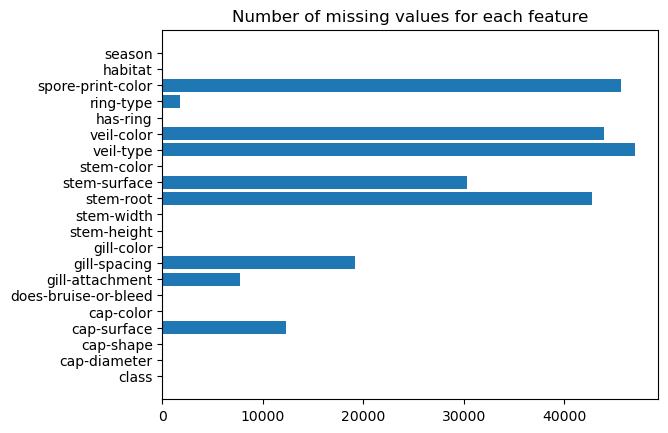

In [6]:
nans = mushroom_train.isnull().sum().reset_index(name="count")
plt.barh(nans['index'], nans['count'])
plt.title("Number of missing values for each feature")

Some of the features have a lot of missing values which is very unfortunate. One of them is spore-print-color which is a very good feature for making predictions on its own. So we will try to fill the missing values instead of dropping the columns.

# 4. Data Processing

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

labelencoder = LabelEncoder()

labelencoder.fit(data["class"])
labelencoder.classes_ = ['p','e']
data["class"] = labelencoder.transform(data["class"])
y_data = data["class"]
data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,0,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,0,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,0,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,0,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,52.41,o,y,y,f,p,NaN,y,5.47,...,NaN,k,k,NaN,NaN,f,f,NaN,d,u
61065,1,54.81,o,y,y,f,p,NaN,y,6.67,...,NaN,k,k,NaN,NaN,f,f,NaN,d,s
61066,1,49.95,o,y,y,f,p,NaN,y,6.43,...,NaN,k,n,NaN,NaN,f,f,NaN,d,u
61067,1,53.16,o,y,y,f,p,NaN,y,6.99,...,NaN,k,k,NaN,NaN,f,f,NaN,d,s


Since the column "veil-type" contains only one unique instance, we drop this column as it can not provide any useful information for our analysis.

In [8]:
X.drop(["veil-type"], axis=1, inplace=True)
data.drop(["veil-type"], axis=1, inplace=True)

Next we apply labelEncoder to the categorical features that do not contain NaNs. Then we will use Tree classifier to predict missing values and finally use one-hot encoding to transform our data.

In [9]:
le = LabelEncoder()
labels=[]

for col in data.columns:
    if data[col].dtype == 'object' and data[col].isnull().sum() == 0:
        labels.append({col:{k:v for k, v in zip(np.unique(data[col]),np.arange(len(np.unique(data[col]))))}})
        data[col] = le.fit_transform(data[col])
        
data.iloc[50213:,:]

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
50213,0,2.50,0,NaN,3,0,a,NaN,4,8.42,2.46,NaN,NaN,3,w,0,f,k,1,2
50214,0,3.07,0,NaN,3,0,a,NaN,5,7.24,2.41,NaN,NaN,6,w,0,f,k,1,0
50215,0,3.30,0,NaN,5,0,a,NaN,5,10.22,2.53,NaN,NaN,6,w,0,f,k,1,2
50216,0,3.49,0,NaN,3,0,a,NaN,4,11.00,2.81,NaN,NaN,6,w,0,f,k,1,0
50217,0,2.79,0,NaN,5,0,a,NaN,5,6.97,2.37,NaN,NaN,3,w,0,f,k,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,52.41,3,y,11,0,p,NaN,11,5.47,25.02,NaN,k,4,NaN,0,f,NaN,0,2
61065,1,54.81,3,y,11,0,p,NaN,11,6.67,22.15,NaN,k,4,NaN,0,f,NaN,0,1
61066,1,49.95,3,y,11,0,p,NaN,11,6.43,26.35,NaN,k,6,NaN,0,f,NaN,0,2
61067,1,53.16,3,y,11,0,p,NaN,11,6.99,40.29,NaN,k,4,NaN,0,f,NaN,0,1


# Data Imputation

I have used decision tree classifier to predict the missing values (NaNs). For the training purposes of the classifier, I have only used the training data in order to avoid using test data.

In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

# we drop all the columns that contain NaNs
X_new = data.iloc[:50213, :]
X_new = X_new.drop("class", axis=1)
X_new = X_new.dropna(axis=1, how="any")

X_test = data.iloc[50213:, :]

column = []
for col in data.columns:
    if col !="class" and data[col].isnull().sum() == 0:
        column.append(col)
        
X_test_new = X_test[column]

for col in X.columns:
    if X[col].dtype == 'object' and X[col].isnull().sum() != 0:
        # add back the column we want to replace NaNs
        X_new[col] = X[col]

        # fit the column for entire data
        y_fit = data[col].dropna()
        labels.append({col:{k:v for k, v in zip(np.unique(y_fit),np.arange(len(np.unique(y_fit))))}})
        le.fit(y_fit)

        # instances for which the column is nan
        X_train = X_new[~X[col].isna()]
        y_train = X_train[col]

        X_train.drop([col], axis=1, inplace=True)

        y_train = le.transform(y_train)
        # fit a tree classifier
        clf.fit(X_train, y_train)

        X_pred_train = X_new[X[col].isna()].drop(col , axis=1)
        y_pred_train = clf.predict(X_pred_train)

        X_train[col] = y_train
        X_pred_train[col] = y_pred_train

        X_new = pd.concat([X_train, X_pred_train], axis=0)
        X_new = X_new.sort_index()
        
        # filling NaNs for the test data
        
        X_test_new[col]=X_test[col]
        X_test_normal = X_test_new[~X_test_new[col].isna()]
        X_test_normal[col] = le.transform(X_test_normal[col])
        if X_test[col].isna().sum() != 0:
            X_test_nan = X_test_new[X_test[col].isna()]
            i = X_test_nan.drop(col, axis=1)
            X_test_nan[col] = clf.predict(i)
            X_test_normal = pd.concat([X_test_normal, X_test_nan], axis=0)
        X_test_new = X_test_normal
        X_test_new = X_test_new.sort_index()
        

column = data.columns[1:]
X_new = X_new.reindex(columns = column)
X_test_new = X_test_new.reindex(columns = column)

X_data = pd.concat([X_new, X_test_new], axis=0)
X_data

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,6,2,6,0,2,0,10,16.95,17.09,4,7,11,4,1,2,5,0,3
1,16.60,6,2,6,0,2,0,10,17.99,18.19,4,7,11,4,1,2,5,0,2
2,14.07,6,2,6,0,2,0,10,17.80,17.74,4,7,11,4,1,2,5,0,3
3,14.17,2,3,1,0,2,1,10,15.77,15.98,4,7,11,4,1,5,5,0,3
4,14.64,6,3,6,0,2,0,10,16.53,17.20,4,7,11,4,1,5,5,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,52.41,3,10,11,0,4,0,11,5.47,25.02,0,4,4,4,0,1,3,0,2
61065,54.81,3,10,11,0,4,0,11,6.67,22.15,0,4,4,4,0,1,3,0,1
61066,49.95,3,10,11,0,4,0,11,6.43,26.35,0,4,6,4,0,1,3,0,2
61067,53.16,3,10,11,0,4,0,11,6.99,40.29,0,4,4,4,0,1,3,0,1


We use the below function to turn the numerical values of the categorical instances into alphabetic values

In [11]:
def numerical_to_labels(df,labels):
    """Accepts a pandas data frame and changes the numerical values back to alphabetic values"""
    for label in labels:
        for key, values in label.items():
            for k, v in values.items():
                df[key][df[key] == v] = k

In [12]:
numerical_to_labels(X_data, labels)

In [13]:
X_data.iloc[:50213, :]

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,c,w,16.95,17.09,s,y,w,w,t,g,u,d,w
1,16.60,x,g,o,f,e,c,w,17.99,18.19,s,y,w,w,t,g,u,d,u
2,14.07,x,g,o,f,e,c,w,17.80,17.74,s,y,w,w,t,g,u,d,w
3,14.17,f,h,e,f,e,d,w,15.77,15.98,s,y,w,w,t,p,u,d,w
4,14.64,x,h,o,f,e,c,w,16.53,17.20,s,y,w,w,t,p,u,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50208,1.18,s,s,y,f,f,f,f,3.93,6.22,b,g,y,w,f,f,k,d,a
50209,1.27,f,s,y,f,f,f,f,3.18,5.43,b,g,y,w,f,f,k,d,a
50210,1.27,s,s,y,f,f,f,f,3.86,6.37,b,g,y,w,f,f,k,d,u
50211,1.24,f,s,y,f,f,f,f,3.56,5.44,b,g,y,w,f,f,k,d,u


We use one-hot encoding to turn categorical features into binary columns since these features are not ordinal.

In [14]:
columns = []
for col in X_data.columns:
    if X_data[col].dtype == 'object':
        columns.append(col)
        
for col in columns:
    # use get_dummies() to one-hot encode the col columns
    one_hot_df = pd.get_dummies(X_data[col], prefix=col)

    # concatenate the one-hot encoded dataframe with the original dataframe
    X_data = pd.concat([X_data.drop(col, axis=1), one_hot_df], axis=1)

In [15]:
X_data

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,15.26,16.95,17.09,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,16.60,17.99,18.19,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,14.07,17.80,17.74,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,14.17,15.77,15.98,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,14.64,16.53,17.20,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,52.41,5.47,25.02,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
61065,54.81,6.67,22.15,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
61066,49.95,6.43,26.35,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
61067,53.16,6.99,40.29,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


After data processing, we have the following testing and training data.

In [16]:
X_train = X_data.iloc[:50213, :]
y_train = y_data.iloc[:50213]

X_test = X_data.iloc[50213:, :]
y_test = y_data.iloc[50213:]

# 5. Data Augmentation (Creating at least 2 New Features)

In [17]:
def cap_area(df):
    """Accepts pandas dataframe and computes the surface area of the cap."""
    df["area"] = np.round(np.pi * df["cap-diameter"]**2 / 4, 2)

def stem_curved_surface_area(df):
    """Accepts pandas dataframe and computes the curved surface area of the stem"""
    df["stem_curved_surface_area"] = np.round(np.pi * df["stem-width"] * df["stem-height"], 2)
    
cap_area(X_train)
cap_area(X_test)
stem_curved_surface_area(X_train)
stem_curved_surface_area(X_test)

# 6.  Logistic Regression & Statistical Hypothesis Testing

In [18]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

predictions = clf.predict(X_test)
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.7581303646466054, 0.5218312453942521)

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("%-12s %f" % ('MSE:', mse))
print("%-12s %f" % ('RMSE:', rmse))

MSE:         0.478169
RMSE:        0.691497


In [20]:
import statsmodels.api as sm

sm_x = sm.add_constant(X_train.iloc[:, :3])

log_reg = sm.Logit(y_train, sm_x).fit()

Optimization terminated successfully.
         Current function value: 0.665016
         Iterations 5


In [21]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                50213
Model:                          Logit   Df Residuals:                    50209
Method:                           MLE   Df Model:                            3
Date:                Fri, 03 Mar 2023   Pseudo R-squ.:                 0.02134
Time:                        20:55:33   Log-Likelihood:                -33392.
converged:                       True   LL-Null:                       -34121.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.8202      0.022    -37.116      0.000      -0.864      -0.777
cap-diameter     0.0964      0.004     21.460      0.000       0.088       0.105
stem-height     -0.0065      0.003     -1.91

# 7. Dimensionality Reduction using PCA



In [22]:
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler()

scaler_train.fit(X_train[["cap-diameter", "stem-height", "stem-width"]])

X_train[["cap-diameter", "stem-height", "stem-width"]] = scaler_train.transform(X_train[["cap-diameter", "stem-height", "stem-width"]])

X_test[["cap-diameter", "stem-height", "stem-width"]] = scaler_train.transform(X_test[["cap-diameter", "stem-height", "stem-width"]])

In [23]:
from sklearn.decomposition import PCA


pca_train = PCA(n_components=10, random_state=0)
pca_train.fit(X_train)

X_train_10 = pca_train.transform(X_train)

pca_test = PCA(n_components=10, random_state=0)
pca_test.fit(X_test)

X_test_10 = pca_test.transform(X_test)

In [24]:
print("Variance eplained by each successive feature in percent:")
print("Train data:")
print(np.cumsum(pca_train.explained_variance_ratio_*100))
print("Test data:")
print(np.cumsum(pca_test.explained_variance_ratio_*100))

Variance eplained by each successive feature in percent:
Train data:
[86.04029553 99.98666761 99.98790866 99.98880222 99.98958641 99.99023361
 99.9908397  99.99141119 99.99193784 99.9924    ]
Test data:
[88.60557131 99.99831387 99.99855757 99.99873425 99.99885757 99.99897029
 99.99907562 99.9991541  99.99922945 99.99929348]


# 8. Experiment with any 2 other models (Non-Ensemble)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_10, y_train)

predictions = neigh.predict(X_test_10)

neigh.score(X_train_10, y_train), neigh.score(X_test_10, y_test)

(0.8735586401927787, 0.47494473102431833)

In [26]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("%-12s %f" % ('MSE:', mse))
print("%-12s %f" % ('RMSE:', rmse))

MSE:         0.525055
RMSE:        0.724607


In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train_10, y_train)

predictions = clf.predict(X_test_10)

clf.score(X_train_10, y_train), clf.score(X_test_10, y_test)

(1.0, 0.5649410464259396)

In [28]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("%-12s %f" % ('MSE:', mse))
print("%-12s %f" % ('RMSE:', rmse))

MSE:         0.435059
RMSE:        0.659590


# 9. Experiment with 1 Ensemble Method

In [29]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_samples=0.05, random_state=0)

forest.fit(X_train_10, y_train)

predictions = forest.predict(X_test_10)

forest.score(X_train_10, y_train), forest.score(X_test_10, y_test)

(0.9829327066695875, 0.46628592483419307)

In [30]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("%-12s %f" % ('MSE:', mse))
print("%-12s %f" % ('RMSE:', rmse))

MSE:         0.533714
RMSE:        0.730557


# 10. Cross-Validation & Hyperparameter Tuning for All 3 Models

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
# hyperparameter selection for Nearest Neighbours Classifier
max_index=3
maximum = 0
for i in range(3,20,2):
    neigh = KNeighborsClassifier(n_neighbors=i)
    scores_neigh = cross_val_score(neigh, X_train_10, y_train, cv=20)
    if maximum < scores_neigh.mean():
        maximum = scores_neigh.mean()
        max_index=i

print(f"Nearest Neighbours Classifier performs best with n_neighbors={max_index}",
        "with %0.2f accuracy " % maximum)

Nearest Neighbours Classifier performs best with n_neighbors=3 with 0.52 accuracy 


In [33]:
# hyperparameter selection for Decision Tree Classifier
max_index=3
maximum = 0
for i in range(10,30):
    clf = DecisionTreeClassifier(random_state=0, max_depth=i)
    scores_clf = cross_val_score(clf, X_train_10, y_train, cv=20)
    if maximum < scores_clf.mean():
        maximum = scores_clf.mean()
        max_index=i

print(f"Decision Tree Classifier performs best with max_depth={max_index}",
        "with %0.2f accuracy " % maximum)

Decision Tree Classifier performs best with max_depth=24 with 0.63 accuracy 


In [34]:
# hyperparameter selection for Random Forest Classifier
max_index=3
maximum = 0
for i in range(50,1000,50):
    forest = RandomForestClassifier(n_estimators=i, max_samples=0.05, random_state=0)
    scores_forest = cross_val_score(forest, X_train_10, y_train, cv=5)
    if maximum < scores_forest.mean():
        maximum = scores_forest.mean()
        max_index=i

print(f"Random Forest Classifier performs best with n_neighbors={max_index}",
        "with %0.2f accuracy " % maximum)

Random Forest Classifier performs best with n_neighbors=200 with 0.50 accuracy 


# 11. Report Final Results 

In [35]:
from sklearn import metrics

In [36]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_10, y_train)
predictions = neigh.predict(X_test_10)

print("Metrics on test results for Nearest Neighbours Classifier:")
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, predictions)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, predictions)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, predictions)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, predictions)))

Metrics on test results for Nearest Neighbours Classifier:
Accuracy:    0.479827
Precision:   0.628715
Recall:      0.221417
F1 Score:    0.327498


In [37]:
clf = DecisionTreeClassifier(random_state=0, max_depth=24)
clf.fit(X_train_10, y_train)
predictions = clf.predict(X_test_10)

print("Metrics on test results for Decision Tree Classifier:")
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, predictions)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, predictions)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, predictions)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, predictions)))

Metrics on test results for Decision Tree Classifier:
Accuracy:    0.574613
Precision:   0.628098
Recall:      0.628502
F1 Score:    0.628300


In [39]:
forest = RandomForestClassifier(n_estimators=200, max_samples=0.05, random_state=0)
forest.fit(X_train_10, y_train)
predictions = forest.predict(X_test_10)

print("Metrics on test results for Random Forest Classifier:")
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, predictions)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, predictions)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, predictions)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, predictions)))

Metrics on test results for Random Forest Classifier:
Accuracy:    0.498710
Precision:   0.651181
Recall:      0.266345
F1 Score:    0.378057


We conclude that the best performing classifier is Decision Tree Classifier for all four metrics.